# House Sales in King County, USA


In [ ]:
#After executing the below command restart the kernel and run all cells.
!pip3 install scikit-learn --upgrade --user

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

Load the csv:


In [2]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [4]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data_types = df.dtypes
print(data_types)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


# Data Wrangling


In [7]:
df.drop(columns=['id', 'Unnamed: 0'], inplace=True)
summary = df.describe()
print(summary)

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

Find null values for <code> bedrooms</code>  and <code> bathrooms </code>


In [5]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


Replace the missing values of the column <code>'bedrooms' and 'bathrooms'</code> with the mean of the column


In [9]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

#check for null
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Data Analysis


Count the number of houses with unique floor values.


In [10]:

# Count the number of houses with unique floor values using value_counts()
floor_counts = df['floors'].value_counts()

# Convert the result to a DataFrame using to_frame()
floor_counts_df = floor_counts.to_frame()

print(floor_counts_df)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


Use vizualization to find whether houses with a waterfront view or without a waterfront view have more price outliers.


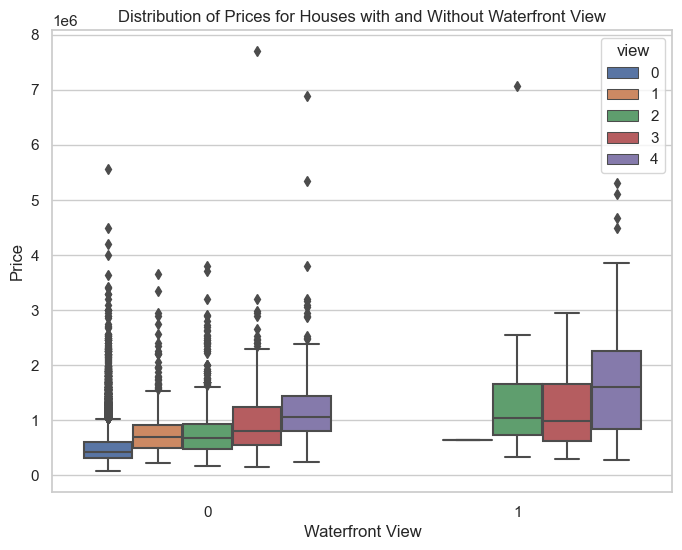

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data' and contains the columns 'floors', 'waterfront', and 'price'
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create a boxplot to compare the distribution of prices for houses with and without a waterfront view
sns.boxplot(x="waterfront", y="price", hue="view", data=df)

# Adding labels and title
plt.xlabel("Waterfront View")
plt.ylabel("Price")
plt.title("Distribution of Prices for Houses with and Without Waterfront View")

# Show the plot
plt.show()

Determine if  <code>sqft_above</code> is negatively or positively correlated with price.

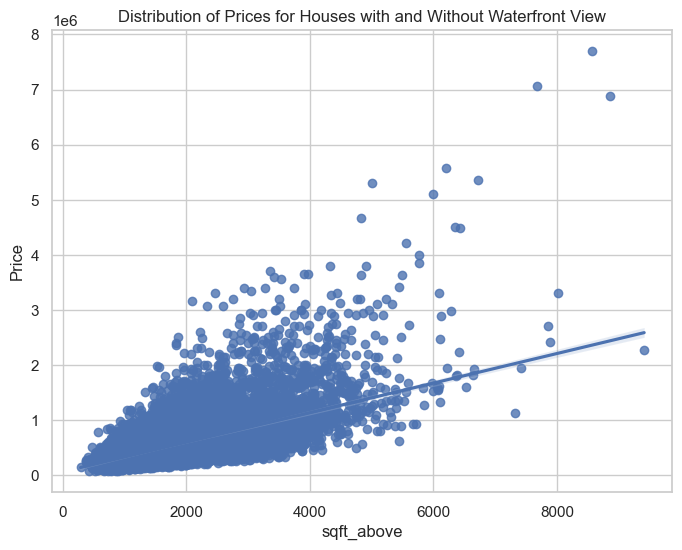

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data' and contains the columns 'floors', 'waterfront', and 'price'
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create a boxplot to compare the distribution of prices for houses with and without a waterfront view
sns.regplot(x="sqft_above", y="price", data=df)

# Adding labels and title
plt.xlabel("sqft_above")
plt.ylabel("Price")
plt.title("Distribution of Prices for Houses with and Without Waterfront View")

# Show the plot
plt.show()

Columns that are most correlated with price.


In [14]:
df.drop(columns=['date']).corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
Unnamed: 0       0.027372
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

Linear regression model to predict the <code>'price'</code> using <code>'sqft_living'</code>and then calculate the R^2.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[['sqft_living']]
Y = df['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)

print(f"R-squared value: {r2}")

R-squared value: 0.49406905389089006


Linear regression model to predict the <code>'price'</code> using the list of features:


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming your DataFrame is named 'df'
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Convert string values to numerical (0 or NaN)
# Assuming 'waterfront' and 'view' are columns with string values
df['waterfront'] = df['waterfront'].apply(lambda x: 1 if x == "waterfront" else 0)
df['view'] = df['view'].apply(pd.to_numeric, errors='coerce')

# Separate features and target
X = df[features]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the prices on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

print(f"R-squared value: {r2}")


R-squared value: 0.6407485782300257



Create a list of tuples




In [20]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]


Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2.


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming your DataFrame is named 'df'
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Separate features and target
X = df[features]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of tuples for the pipeline
estimators = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]

# Create the pipeline object
pipeline = Pipeline(estimators)

# Fit the pipeline object to the training data
pipeline.fit(X_train, y_train)

# Predict the prices on the test data
y_pred = pipeline.predict(X_test)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

print(f"R-squared value: {r2}")


R-squared value: 0.6596204330371092


#  Model Evaluation and Refinement


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


Train_test_split

In [22]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371



Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.


In [23]:
from sklearn.linear_model import Ridge

In [24]:
X = df[features]
y = df['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

print("Number of test samples:", x_test.shape[0])
print("Number of training samples:", x_train.shape[0])

# Create and fit Ridge regression object
ridge = Ridge(alpha=0.1)  # Set the regularization parameter
ridge.fit(x_train, y_train)

# Predict the prices on the test data
y_pred = ridge.predict(x_test)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

print(f"R-squared value: {r2}")

Number of test samples: 3242
Number of training samples: 18371
R-squared value: 0.6254758997939864


Second order polynomial transform on both the training data and testing data. Creating and fitting a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Assuming your DataFrame is named 'df'
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Separate features and target
X = df[features]
y = df['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

# Perform second-order polynomial transform on the features
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Create and fit Ridge regression object
ridge = Ridge(alpha=0.1)  # Set the regularization parameter
ridge.fit(x_train_poly, y_train)

# Predict the prices on the test data
y_pred = ridge.predict(x_test_poly)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

print(f"R-squared value: {r2}")


R-squared value: 0.6485636019817984
